In [1]:
import matplotlib.pyplot as plt

In [2]:
def load_data(filename):
    return [[float(j) for j in i.split(',')] for i in open(filename, 'r').read().split('\n')]

In [3]:
def cost_f(ls_theta):
    '''
        Return average of error predict y = θ_0 + θ_1*x_1 + θ_2*x_2 + ... + θ_n*x_n 
    '''
    sum_error = 0.0
    for data_i in data:
        predict_value = ls_theta[0]
        for i in range(data_i.__len__() - 1):
            predict_value += data_i[i]*ls_theta[i + 1]
            
        sum_error += abs(predict_value - data_i[-1])
        
    return sum_error/data.__len__()

In [4]:
def sum_subs_fx_theta(ls_theta, idx):
    '''
       ls_theta: list
       idx: int, idx of theta_i in ls_theta
       Calculate:
           1/m  Σ(θ_0 + θ_1*x_1_i θ_2*x_2_i + ... + θ_n*x_n_i - y_i)
    '''
    sum_subs = 0.0
    for data_i in data:
        sum_subs_tmp = ls_theta[0]
        for i in range(data_i.__len__() - 1):
            sum_subs_tmp += ls_theta[i + 1]*data_i[i]
            
        sum_subs_tmp -= data_i[-1]
        
        if idx > 0:
            sum_subs_tmp *= data_i[idx - 1]
        sum_subs += sum_subs_tmp
        
    return sum_subs

In [5]:
def grad(ls_theta):
    '''
        Calculate derivative of J(θ_0, θ_1) = 1/2m * Σ(θ_0 + θ_1*x_i - y_i)^2. With i:= 0-> m.
        In this:
        (∂*J)/(∂*θ_0) = 1/m  Σ(θ_0 + θ_1*x_i - y_i)
        (∂*J)/(∂*θ_1) = 1/m  Σ[x_i*(θ_0 + θ_1*x_i - y_i)]
            * Note:
                data = [[x_1, y_1], [x_2, y_2],...[x_i, y_i],...[x_m, y_m]]
    '''
    return [sum_subs_fx_theta(ls_theta, i)/data.__len__() for i in range(ls_theta.__len__())]

In [6]:
def gradient_descent(ls_theta):
    '''
        theta_0, theta_1: some initial input to start adjust bit by bit
        return: theta_0, theta_1 after adjust
    '''
    crr_cost = cost_f(ls_theta)
    for loop in range(1000):
        descent_number = [alpha*theta_i for theta_i in grad(ls_theta)]
        new_ls_theta = [ls_theta[i] - descent_number[i] for i in range(ls_theta.__len__())]

#         if cost_f(ls_theta) > crr_cost:
#             break

        ls_theta = new_ls_theta
        crr_cost = cost_f(ls_theta)
    return ls_theta

## For graph

In [7]:
def get_min_max_value():
    min_value = [100000.0 for num in range(data[0].__len__() - 1)]
    max_value = [-100000.0 for num in range(data[0].__len__() - 1)]
    for data_i in data:
        for i in range(data_i.__len__() - 1):
            if min_value[i] > data_i[i]:
                min_value[i] = data_i[i]
            if max_value[i] < data_i[i]:
                max_value[i] = data_i[i]
    return min_value, max_value

In [8]:
def get_point(ls_theta):
    min_value, max_value = get_min_max_value()
    x = [min_value[0], max_value[0]]
    y = [ls_theta[1]*x[0] + ls_theta[0], ls_theta[1]*x[1] + ls_theta[0]]
    return x, y

In [9]:
def show_graph(ls_theta):

#     Draw point
    x_point = [data_i[0] for data_i in data] 
    y_point = [data_i[1] for data_i in data]  
    plt.scatter(x_point, y_point, label='some real value', color= "red", marker= "x", s=10)
    
#     Draw line
    x_line, y_line = get_point(ls_theta)
    plt.plot(x_line, y_line, label='predict line', linewidth=2)

#     Set frame
#     plt.ylim(0,8) 
#     plt.xlim(0,8)

    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')
    plt.title('Linear regression!')
    plt.legend()

    plt.show() 

# Main

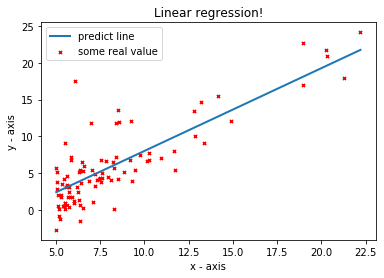

In [16]:
alpha = 0.015
data = list()

def main():
    global data
    data = load_data('ex1data1.txt')

    average = sum([sum([i for i in data_i])/len(data_i) for data_i in data[:-1]])/len(data)
    ls_theta = [average for i in range(data[0].__len__())]
    ls_theta = gradient_descent(ls_theta)
    if len(data[0]) == 2:
        show_graph(ls_theta)
    
    
if __name__ == '__main__':
    main()